In [12]:
%run load_data.ipynb
print (dir())

['DataFrame', 'In', 'Math', 'NPIX', 'NSIDE', 'Out', 'SIZE_RATIO_CUT', 'SNR_CUT', 'Series', 'T_CUT', 'Table', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'a_hp', 'bottleneck', 'display', 'exit', 'filter_by_snr', 'fits', 'get_df_list', 'get_ipython', 'h5py', 'hp', 'i', 'index_2_3', 'index_2_3_true', 'index_2_3_true_negative', 'index_2_3_true_positive', 'index_4_5', 'index_4_5_true', 'index_4_5_true_negative', 'index_4_5_true_positive', 'load_mcal', 'load_true', 'mcal_df_list', 'mcal_df_list_negative', 'mcal_df_list_positive', 'new_index', 'np', 'numexpr', 'pd', 'photdf', 'plt', 'quit', 'temp', 'temp_filled', 'temp_sorted', 'tqdm', 'true_df_list']


In [13]:
import healpy as hp
import astropy_healpix as a_hp

# Choose NSIDE

In [48]:
NSIDE=512

In [49]:
NPIX=hp.nside2npix(NSIDE)
print (NPIX)
print (len(temp))
print ("The ratio of the length of the catalogy to total pixels is: {:.2%}".format(len(temp)/NPIX))

3145728
272818
The ratio of the length of the catalogy to total pixels is: 8.67%


In [50]:
temp=mcal_df_list_positive[0]

temp['ipix']=mcal_df_list_positive[0].apply(lambda x:hp.ang2pix(NSIDE,np.pi/2-np.deg2rad(x['dec']),np.deg2rad(x['ra'])),axis=1)

print("The propotion of rendered objects is: {:.2%}".format(np.sum(temp['ipix']!=0)/len(temp)))

The propotion of rendered objects is: 100.00%


In [51]:
temp=temp.set_index('ipix')
temp=temp.sort_index()

In [52]:
temp_sorted=temp.groupby('ipix').mean()
print ("The propotion of averaged objects is: {:.2%}".format((len(temp)-len(temp_sorted))/len(temp)))

The propotion of averaged objects is: 83.09%


In [53]:
new_index=np.arange(NPIX)

In [54]:
temp_filled=temp_sorted.reindex(index=new_index,fill_value=0)

In [55]:
temp_filled[temp_filled['mask_frac']>0]=1

/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


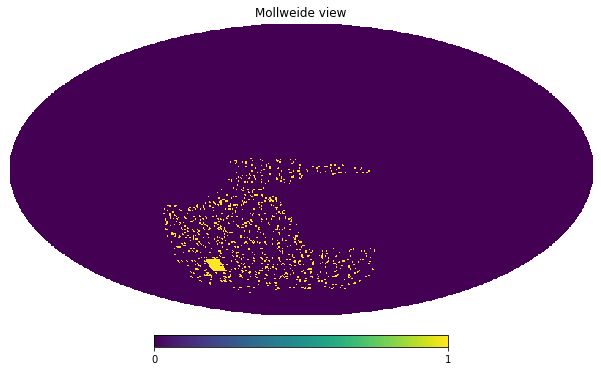

In [56]:
hp.mollview(temp_filled['mask_frac'].to_numpy())